In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement:

Using the Speed Dating Data provided by Kaggle, determine how likely a participant will choose to see a person again (Dec=1) based on how the aspects of the participant's perception of the person and their background (attr, sinc. intel. fun, amb, shar, like, prob, met, career etc)

In [2]:
#df.columns.get_loc('attr1_s')
df = pd.read_csv('Speed Dating Data.csv', usecols= [i for i in range(108)])

### Data Dictionary:


FieldName|Description
---------|-----------------------------------------------------------------------------------
gender|Female=0 Male=1
order|the number of date that night when met partner
int_corr|correlation between participant’s and partner’s ratings of interests in Time 1
samerace|participant and the partner were the same race. 1= yes, 0=no
age_o|age of partner
race|Black/African American=1
	|European/Caucasian-American=2
	|Latino/Hispanic American=3
	|Asian/Pacific Islander/Asian-American=4
	|Native American=5
	|Other=6
imprace|How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?
imprelig|How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?
dec|Decision: 1=Yes 2=No
goal|What is your primary goal in participating in this event? 
	|Seemed like a fun night out=1
	|To meet new people=2
	|To get a date=3
	|Looking for a serious relationship=4
	|To say I did it=5
	|Other=6
date|In general, how frequently do you go on dates? 
	|Several times a week=1
	|Twice a week=2
	|Once a week=3
    |Twice a month=4
	|Once a month=5
	|Several times a year=6
	|Almost never=7
go_out|How often do you go out (not necessarily on dates)?
	|Several times a week=1
	|Twice a week=2
	|Once a week=3
	|Twice a month=4
	|Once a month=5
	|Several times a year=6
	|Almost never=7
career_c|career coded 
    |1= Lawyer 
    |2= Academic/Research 
    |3= Psychologist 
    |4= Doctor/Medicine 
    |5=Engineer 
    |6= Creative Arts/Entertainment 
    |7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
    |8= Real Estate 
    |9= International/Humanitarian Affairs 
    |10= Undecided 
    |11=Social Work
    |12=Speech Pathology
    |13=Politics
    |14=Pro sports/Athletics
    |15=Other
    |16=Journalism
    |17=Architecture
attr|Rate attraction of partner 1-10
sinc|Rate sincerity of partner 1-10
intel|Rate intelligence of partner 1-10
fun|Rate fun(ness) of partner 1-10
amb|Rate ambition of partner 1-10
shar|Rate shared interest of partner 1-10
like|Overall, how much do you like this person? (1=don't like at all, 10=like a lot)
prob|How probable do you think it is that this person will say 'yes' for you? (1=not probable, 10=extremely probable)
met|Have you met this partner before: 1=Yes 2=No

In [3]:
#Since the data has so many features, remove cols not needed for analysis
col_to_drop = ['id', 'iid', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'partner', 'met_o', \
               'race_o', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', \
               'prob_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', \
               'age', 'field_cd', 'field', 'undergra', 'career', 'pid', 'match', 'from', 'zipcode', \
               'mn_sat', 'tuition', 'income'] #might keep income
first_part = df.iloc[:, :df.columns.get_loc('career_c' )+1].drop(col_to_drop, axis=1)
second_part = df.iloc[:, df.columns.get_loc('dec'):df.columns.get_loc('met')+1]

df = first_part.join(second_part)

In [9]:
print df.describe()

            gender        order     int_corr     samerace        age_o  \
count  8378.000000  8378.000000  8220.000000  8378.000000  8274.000000   
mean      0.500597     8.927668     0.196010     0.395799    26.364999   
std       0.500029     5.477009     0.303539     0.489051     3.563648   
min       0.000000     1.000000    -0.830000     0.000000    18.000000   
25%       0.000000     4.000000          NaN     0.000000          NaN   
50%       1.000000     8.000000          NaN     0.000000          NaN   
75%       1.000000    13.000000          NaN     1.000000          NaN   
max       1.000000    22.000000     0.910000     1.000000    55.000000   

              race      imprace     imprelig         goal         date  \
count  8315.000000  8299.000000  8299.000000  8299.000000  8281.000000   
mean      2.757186     3.784793     3.651645     2.122063     5.006762   
std       1.230905     2.845708     2.805237     1.407181     1.444531   
min       1.000000     0.000000     1

In [13]:
df.met.value_counts().sort_index()

0.0    4047
1.0     351
2.0    3597
3.0       1
5.0       2
6.0       1
7.0       3
8.0       1
Name: met, dtype: int64

In [ ]:
#decided to drop this variable; should be only 1's and 2's so it seems too problematic
df.drop('met', axis=1)

#### Prevalence/Bias

In [ ]:
pd.crosstab(df.dec, 'percentage', normalize='columns')

### Graphs

#### Distribution of outcome in dataset

In [ ]:
plt.hist(df.dec, bins=6)
plt.xlabel('Decision Yes =1, No =0')
plt.ylabel('number of participants')
plt.title('Participants per decision')

In [ ]:
plt.hist(df.race, bins=20)
plt.xlabel('race')
plt.ylabel('number of participants')
plt.title('Participants per race')

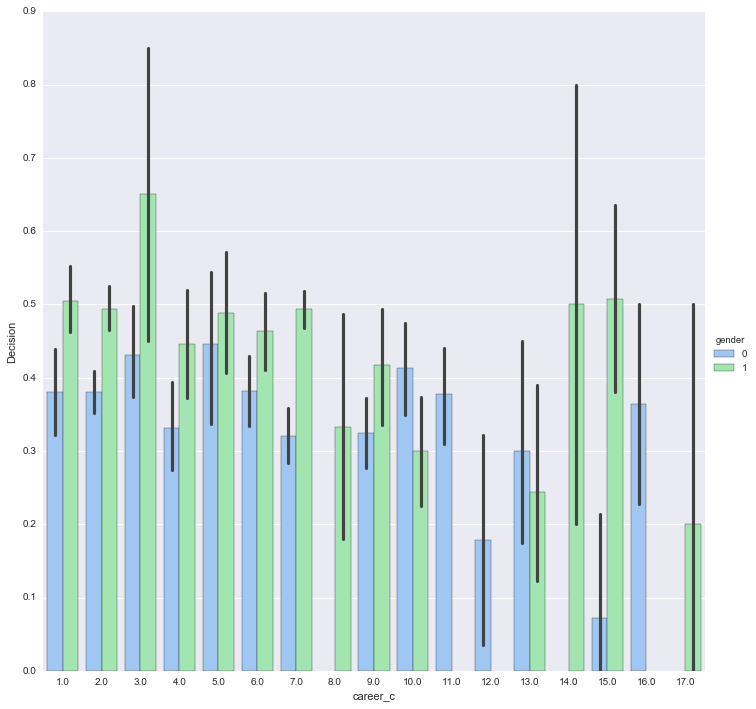

In [80]:
g = sns.factorplot(x="career_c", y="dec", hue="gender", data=df,
                   size=10, kind="bar", palette="pastel")
g.despine(left=True)
g.set_ylabels("Decision probability")

In [ ]:
df[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']].plot(kind='box')
plt.ylabel('rating 1-10')
plt.title('Partner ratings per category')

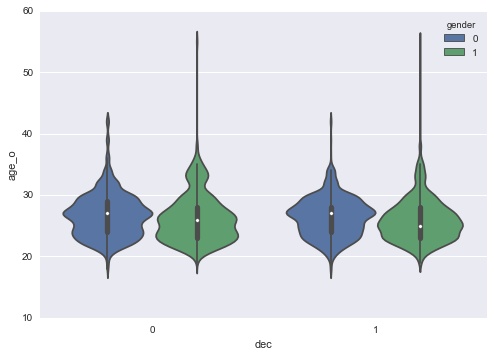

In [16]:
sns.violinplot(x='dec', y='age_o', hue='gender', data=df)

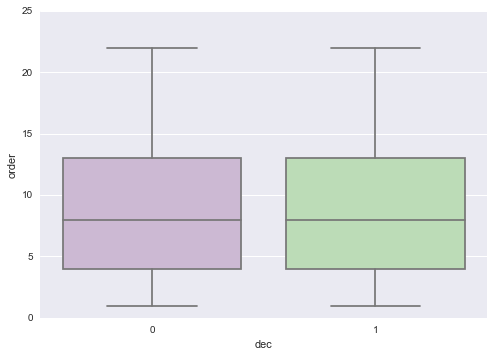

In [85]:
sns.boxplot(x='dec', y='order', data=df, palette='PRGn')

#### Heatmap of correlations between numerical variables
    6

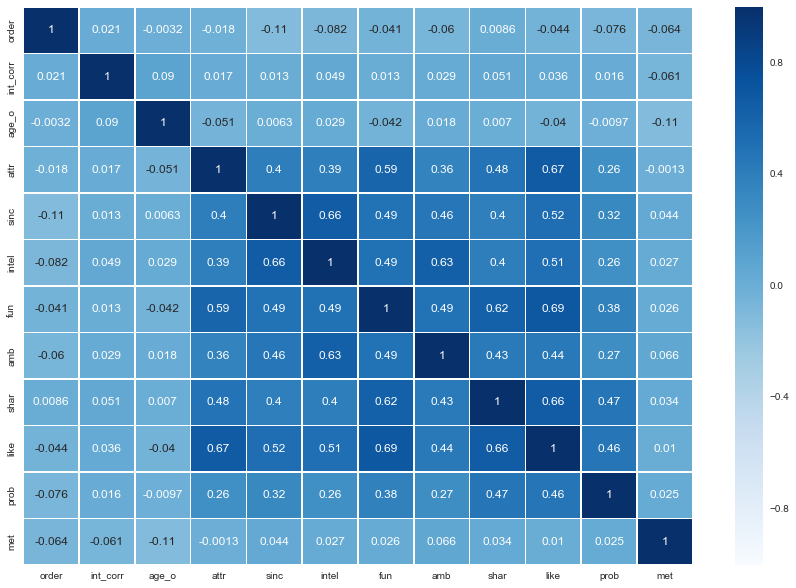

In [91]:
categoricals = ['gender', 'samerace', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c']
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.drop(categoricals, axis=1).drop('dec', axis=1).corr(), annot=True, linewidths=0.5, cmap="Blues")

#### Handling NULL values

In [ ]:
#NULL VALUES
df.isnull().sum()

In [ ]:
pd.DataFrame({'mean': df.mean(),  'median': df.median(), 'null_amt': df.isnull().sum()})

In [ ]:
#replacing NULL values for numerical columns with over under 200 NULLs with median
cols_median = ['age_o', 'int_corr', 'imprace', 'imprelig']
df[cols_median] = df[cols_median].apply(lambda x: x.fillna(x.median()))

In [ ]:
#replacing NULL values for categorical columns with over under 200 NULLs with mode - code not working as desired
cols_mode = ['race', 'goal', 'date', 'go_out', 'career_c']
df[cols_mode] = df[cols_mode].apply(lambda x: x.fillna(x.mode()))

#attempted Imputer method with the same results- code runs without errors but columns still show NULL values
#df[cols_mode].isnull().sum()

In [ ]:
#manual fillna
df['race'].fillna(2.0, inplace=True)
df['goal'].fillna(1.0, inplace=True)
df['date'].fillna(6.0, inplace=True)
df['go_out'].fillna(2.0, inplace=True)
df['career_c'].fillna(2.0, inplace=True)

In [ ]:
#get dummies for categorical variables
race_dum = pd.get_dummies(df.race, prefix='race', drop_first=True)
goal_dum = pd.get_dummies(df.goal, prefix='goal', drop_first=True)
date_dum = pd.get_dummies(df.date, prefix='date', drop_first=True)
goout_dum = pd.get_dummies(df.go_out, prefix='goout', drop_first=True)
career_dum = pd.get_dummies(df.career_c, prefix='career', drop_first=True)

In [ ]:
#add to data and remove original columns
dfs = [race_dum, goal_dum, date_dum, goout_dum, career_dum, df]
df = pd.concat(dfs, axis=1)
df.head()

In [ ]:
df.shape

In [ ]:
df2 = df.dropna()
df2.shape

In [ ]:
corr = df2.corr()
corr.where((abs(corr)>.5) & (corr<1))
#how to print out just column value, row value and actual value to save space and actually be able to see the values

In [ ]:
#do something with the highly correlated variables? what's considered too high? Do I just remove one variable?

#### Using linear regression to predict NULL values for columns with over 200 NULLs

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score

model = Ridge()
col_na = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']
X = df.dropna(subset= ['shar']).drop(col_na, axis=1)
y = df['shar'].dropna()

score = {}
alpha = np.logspace(1,10,100)
for a in alpha:
    model.set_params(alpha=a)
    mse = cross_val_score(model, X, y, cv=5, scoring='mean_squared_error')
    score[a] = mse.mean()
mse = pd.Series(score)
mse.idxmin()
model.set_params(alpha=mse.idxmin())
model.fit(X,y)

In [ ]:
mse

In [ ]:
col_na = ['attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'prob', 'met']
df.loc[pd.isnull(df.shar), 'shar'] = model.predict(df.dropna(subset=col_na)[pd.isnull(df.dropna(subset=col_na).shar)])
#receving error for NaN, infinity or a number too large 
#(looked at model.predict(df.dropna(subset=col_na)[pd.isnull(df.dropna(subset=col_na).shar)]) 
#which has no nan values in anything other than shar column

In [ ]:
#back up method is to fill na with their medians and mode like the other variables
#df['met'] = df[cols_mode].fillna(df['met'].mode())
#cols_median = ['attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'prob']
#df[cols_median] = df[cols_median].apply(lambda x: x.fillna(x.median()))